In [573]:
import spacy
import textdescriptives
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from docx import Document
nlp = spacy.load("es_core_news_lg")
nlp.add_pipe("textdescriptives/all")
nlp.disable_pipes('ner')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")
emotion_analyzer = create_analyzer(task="emotion", lang="es")
from tqdm import tqdm
import numpy as np
from spacy.tokens import Doc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
def leer_docx(nombre_archivo):
    texto = ""
    doc = Document(nombre_archivo)
    for paragraph in doc.paragraphs:
        texto += paragraph.text + "\n"
    return texto

In [19]:
def limpiar(frase):
    frase = frase.lower()
    doc = nlp(frase)
    lista_limpia = [token.text for token in doc if not token.is_space and not token.is_stop and not token.is_punct]
    return lista_limpia

In [20]:
def union(lista):
    return " ".join(lista)

In [21]:
def stopYlematizar(frase):
    frase = frase.lower()
    doc = nlp(frase)
    lista_limpia = [token.lemma_ for token in doc if token.is_alpha]
    frase = " ".join(lista_limpia)
    doc = nlp(frase)
    lista_limpia = [token.text for token in doc if not token.is_space and not token.is_stop and not token.is_punct]
    return lista_limpia

In [22]:
def frecuencias(lista):
    df = pd.DataFrame(lista)
    conteo_frecuencias = df.value_counts()
    frecuencias = conteo_frecuencias.to_frame()
    frecuencias.reset_index(inplace = True)
    frecuencias.columns = ['token', 'conteo']
    frecuencias = frecuencias.sort_values(by='conteo', ascending=False)
    return frecuencias

In [23]:
def semantica(frase, tipo):
    frase = frase.lower()
    doc = nlp(frase)
    lista = [token.text for token in doc if token.pos_ == tipo]
    return lista

In [24]:
def entidades(frase):
    frase = frase.lower()
    doc = nlp(frase)
    lista = [ent.text for ent in doc.ents]
    return lista

## Limpieza de los libros

In [25]:
#Leemos el word
ReinoDeFuego = leer_docx(".\Libros\El Reino del Fuego.docx")
ReinoDeFuego = ReinoDeFuego[1387:]

In [26]:
# Obtenemos el libro completo por párrafo
ReinoDeFuego_x_Frase = ReinoDeFuego.split("\n")
ReinoDeFuego_x_Frase = list(filter(None, ReinoDeFuego_x_Frase))
ReinoDeFuego_x_Frase

['Prólogo.',
 'Estaba ahí parada, viendo hacia el abismo de llamas azules.',
 'Este fuego tan singular posee un color tan hermoso y frío que, con sólo verlo, tus ojos podrían congelarse gracias a su matiz extremadamente gélido.',
 'En ese momento pude verlo, al chico de cabello verde que se encuentra en mis recuerdos, siendo él ahora un hombre. Traté de alcanzarlo, pero éste se fue volando hacia un sujeto encapuchado de largas túnicas negras, el cual flotaba sobre un mar de fuego azul que cubría la tierra por doquier. Ese joven iba hacia su destino y yo quería seguirlo, mas un sentimiento de nostalgia me invadió y no pude siquiera moverme ante tal escena.',
 'Entonces recordé a mi viejo amigo, aquél que odiaba al mundo y luchaba por sus propios ideales. Una vez él fue uno de ellos, un ser débil con falta de voluntad para hacer lo correcto. Éste sentía un horrible dolor en ese entonces, pues creía que no era digno ni de su propia vida. Atentó tanto contra ella, que hubo una vez en la cu

In [27]:
ReinoDeFuego = " ".join(ReinoDeFuego_x_Frase)
ReinoDeFuego

'Prólogo. Estaba ahí parada, viendo hacia el abismo de llamas azules. Este fuego tan singular posee un color tan hermoso y frío que, con sólo verlo, tus ojos podrían congelarse gracias a su matiz extremadamente gélido. En ese momento pude verlo, al chico de cabello verde que se encuentra en mis recuerdos, siendo él ahora un hombre. Traté de alcanzarlo, pero éste se fue volando hacia un sujeto encapuchado de largas túnicas negras, el cual flotaba sobre un mar de fuego azul que cubría la tierra por doquier. Ese joven iba hacia su destino y yo quería seguirlo, mas un sentimiento de nostalgia me invadió y no pude siquiera moverme ante tal escena. Entonces recordé a mi viejo amigo, aquél que odiaba al mundo y luchaba por sus propios ideales. Una vez él fue uno de ellos, un ser débil con falta de voluntad para hacer lo correcto. Éste sentía un horrible dolor en ese entonces, pues creía que no era digno ni de su propia vida. Atentó tanto contra ella, que hubo una vez en la cual trató de quitá

In [28]:
#Leemos el word
HombreEquivocado = leer_docx(".\Libros\El hombre equivocado - John Katzenbach.docx")
HombreEquivocado = HombreEquivocado[1893:]
HombreEquivocado

"\n\n1 - El profesor de Historia y las dos mujeres\n\nCuando Scott Freeman leyó por primera vez la carta que encontró en un cajón de la cómoda de su hija, dos semanas después de la última visita de ésta a su casa, arrugada y oculta tras unos viejos calcetines blancos, tuvo la súbita certeza de que alguien iba a morir.\nNo fue una sensación clara y definida, pero lo embargó con la intensidad de una amenaza inminente. Cuando logró sosegarse un poco, se quedó inmóvil y repasó una y otra vez las palabras escritas en el papel.\n\nNadie puede amarte como yo lo hago. Nadie lo hará jamás. Estamos hechos el uno para el otro, y nada lo impedirá. Estaremos juntos para siempre. De un modo u otro.\n(Sin firma)\n\nEstaba impresa en papel corriente y con letra cursiva, lo que le daba un aire anticuado. No pudo encontrar el sobre donde venía, así que no había ningún remite, ni siquiera un matasellos que él pudiera comprobar. La colocó sobre la cómoda y trató de alisar las arrugas que le daban un aspec

In [29]:
# Obtenemos el libro completo por párrafo
HombreEquivocado_x_Frase = HombreEquivocado.split("\n")
HombreEquivocado_x_Frase = list(filter(None, HombreEquivocado_x_Frase))
HombreEquivocado_x_Frase

['1 - El profesor de Historia y las dos mujeres',
 'Cuando Scott Freeman leyó por primera vez la carta que encontró en un cajón de la cómoda de su hija, dos semanas después de la última visita de ésta a su casa, arrugada y oculta tras unos viejos calcetines blancos, tuvo la súbita certeza de que alguien iba a morir.',
 'No fue una sensación clara y definida, pero lo embargó con la intensidad de una amenaza inminente. Cuando logró sosegarse un poco, se quedó inmóvil y repasó una y otra vez las palabras escritas en el papel.',
 'Nadie puede amarte como yo lo hago. Nadie lo hará jamás. Estamos hechos el uno para el otro, y nada lo impedirá. Estaremos juntos para siempre. De un modo u otro.',
 '(Sin firma)',
 'Estaba impresa en papel corriente y con letra cursiva, lo que le daba un aire anticuado. No pudo encontrar el sobre donde venía, así que no había ningún remite, ni siquiera un matasellos que él pudiera comprobar. La colocó sobre la cómoda y trató de alisar las arrugas que le daban un

In [30]:
HombreEquivocado = " ".join(HombreEquivocado_x_Frase)
HombreEquivocado

"1 - El profesor de Historia y las dos mujeres Cuando Scott Freeman leyó por primera vez la carta que encontró en un cajón de la cómoda de su hija, dos semanas después de la última visita de ésta a su casa, arrugada y oculta tras unos viejos calcetines blancos, tuvo la súbita certeza de que alguien iba a morir. No fue una sensación clara y definida, pero lo embargó con la intensidad de una amenaza inminente. Cuando logró sosegarse un poco, se quedó inmóvil y repasó una y otra vez las palabras escritas en el papel. Nadie puede amarte como yo lo hago. Nadie lo hará jamás. Estamos hechos el uno para el otro, y nada lo impedirá. Estaremos juntos para siempre. De un modo u otro. (Sin firma) Estaba impresa en papel corriente y con letra cursiva, lo que le daba un aire anticuado. No pudo encontrar el sobre donde venía, así que no había ningún remite, ni siquiera un matasellos que él pudiera comprobar. La colocó sobre la cómoda y trató de alisar las arrugas que le daban un aspecto apremiante. 

In [31]:
# Lista de codificaciones comunes a probar
codificaciones = ['utf-8']

for codificacion in codificaciones:
        with open(".\\Libros\\100 años de soledad.txt", 'r', encoding=codificacion) as archivo:
            # Lee el contenido del archivo
            cien_anos_soledad = archivo.read()

# Imprime el contenido del archivo (o una parte de él si es muy largo)
print(cien_anos_soledad[:1000])  # Imprime los primeros 1000 caracteres para verificar


I
Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de 
recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces 
una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas 
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos 
prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para 
mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia 
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y 
timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de 
barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una 
truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios 
alquimistas de Macedonia. Fue de casa en casa arrastrando 

In [32]:
# Obtenemos el libro completo por párrafo
cien_anos_soledad_x_Frase = cien_anos_soledad.split("\n")
cien_anos_soledad_x_Frase = list(filter(None, cien_anos_soledad_x_Frase))
cien_anos_soledad_x_Frase

['I',
 'Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de ',
 'recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces ',
 'una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas ',
 'que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos ',
 'prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para ',
 'mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia ',
 'de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y ',
 'timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de ',
 'barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una ',
 'truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios ',
 'alquimistas 

In [33]:
cien_anos_soledad = " ".join(cien_anos_soledad_x_Frase)
cien_anos_soledad

"I Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de  recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces  una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas  que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos  prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para  mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia  de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y  timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de  barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una  truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios  alquimistas de Macedonia. Fue de casa en casa arrastrando

In [34]:
#Leemos el word
SieteEsqueletosDecapitados = leer_docx(".\Libros\Siete esqueletos decapitados - Antonio Malpica.docx")
SieteEsqueletosDecapitados = SieteEsqueletosDecapitados[689:]
SieteEsqueletosDecapitados

'\n\n\n\nNicte, segunda labor\n\nA través de los arbustos, Nicte acechaba.\nSus ojos no se apartaban del bulto que había depositado en la puerta de la casa del otro lado de la calle. Era una casa bonita de dos pisos. La familia que vivía en el interior era de clase media alta. Pero a Nicte no le preocupaban las etiquetas sociales; en su plan no cabían este tipo de consideraciones. Solo se fijaba, y con gran escrúpulo, en el físico de sus víctimas.\nMiró su reloj de pulsera. Pasaban de las diez y media de la noche. Sabía que las luces en el interior de la casa denotaban preocupación. A esa hora ya solo debería estar encendida la televisión. Pero no ese lunes. No. Prácticamente todas las ventanas estaban vivas. Los corazones de los miembros de la familia se habían vuelto uno; y este latía agitadamente. Un ir y venir de los padres a través de ciertos marcos de luz delataba su angustia.\n«Eso es bueno, —se decía Nicte desde su oculta posición—. Eso es muy bueno».\nSe acomodó en la hierba d

In [35]:
# Obtenemos el libro completo por párrafo
SieteEsqueletosDecapitados_x_frase = SieteEsqueletosDecapitados.split("\n")
SieteEsqueletosDecapitados_x_frase = list(filter(None, SieteEsqueletosDecapitados_x_frase))
SieteEsqueletosDecapitados_x_frase

['Nicte, segunda labor',
 'A través de los arbustos, Nicte acechaba.',
 'Sus ojos no se apartaban del bulto que había depositado en la puerta de la casa del otro lado de la calle. Era una casa bonita de dos pisos. La familia que vivía en el interior era de clase media alta. Pero a Nicte no le preocupaban las etiquetas sociales; en su plan no cabían este tipo de consideraciones. Solo se fijaba, y con gran escrúpulo, en el físico de sus víctimas.',
 'Miró su reloj de pulsera. Pasaban de las diez y media de la noche. Sabía que las luces en el interior de la casa denotaban preocupación. A esa hora ya solo debería estar encendida la televisión. Pero no ese lunes. No. Prácticamente todas las ventanas estaban vivas. Los corazones de los miembros de la familia se habían vuelto uno; y este latía agitadamente. Un ir y venir de los padres a través de ciertos marcos de luz delataba su angustia.',
 '«Eso es bueno, —se decía Nicte desde su oculta posición—. Eso es muy bueno».',
 'Se acomodó en la hi

In [36]:
SieteEsqueletosDecapitados = " ".join(SieteEsqueletosDecapitados_x_frase)
SieteEsqueletosDecapitados

'Nicte, segunda labor A través de los arbustos, Nicte acechaba. Sus ojos no se apartaban del bulto que había depositado en la puerta de la casa del otro lado de la calle. Era una casa bonita de dos pisos. La familia que vivía en el interior era de clase media alta. Pero a Nicte no le preocupaban las etiquetas sociales; en su plan no cabían este tipo de consideraciones. Solo se fijaba, y con gran escrúpulo, en el físico de sus víctimas. Miró su reloj de pulsera. Pasaban de las diez y media de la noche. Sabía que las luces en el interior de la casa denotaban preocupación. A esa hora ya solo debería estar encendida la televisión. Pero no ese lunes. No. Prácticamente todas las ventanas estaban vivas. Los corazones de los miembros de la familia se habían vuelto uno; y este latía agitadamente. Un ir y venir de los padres a través de ciertos marcos de luz delataba su angustia. «Eso es bueno, —se decía Nicte desde su oculta posición—. Eso es muy bueno». Se acomodó en la hierba del jardín. Detr

In [37]:
nlpReinoDeFuego = nlp(ReinoDeFuego)
nlpHombreEquivocado = nlp(HombreEquivocado)
nlpcien_anos_soledad = nlp(cien_anos_soledad)
nlpSieteEsqueletos = nlp(SieteEsqueletosDecapitados)

In [38]:
print(nlpReinoDeFuego._.counts)

print(nlpReinoDeFuego._.sentence_length)

print(nlpReinoDeFuego._.syllables)

print(nlpReinoDeFuego._.token_length)

{'n_tokens': 158612, 'n_unique_tokens': 12643, 'proportion_unique_tokens': 0.07971023629990165, 'n_characters': 740200, 'n_sentences': 7171}
{'sentence_length_mean': 22.118532980058568, 'sentence_length_median': 19.0, 'sentence_length_std': 14.625684484073217}
{'syllables_per_token_mean': 1.8143646130179305, 'syllables_per_token_median': 2.0, 'syllables_per_token_std': 0.9773367878286583}
{'token_length_mean': 4.525288124479863, 'token_length_median': 4.0, 'token_length_std': 2.6072263503585242}


In [39]:
def coeficiente_facilidad_lectora(doc):
    p = doc._.syllables['syllables_per_token_mean']
    f = doc._.sentence_length['sentence_length_mean']
    return 206.84 - 60*p - 1.02*f

In [40]:
print('El Reino de Fuego: ', coeficiente_facilidad_lectora(nlpReinoDeFuego))
print('El Hombre Equivocado: ', coeficiente_facilidad_lectora(nlpHombreEquivocado))
print('100 años de soledad: ', coeficiente_facilidad_lectora(nlpcien_anos_soledad))
print('Siete Esqueletos Decapitados: ', coeficiente_facilidad_lectora(nlpSieteEsqueletos))

El Reino de Fuego:  75.41721957926443
El Hombre Equivocado:  82.96005946219086
100 años de soledad:  68.47470994893098
Siete Esqueletos Decapitados:  87.08440066972203


In [41]:
print("El Reino del Fuego")
print(nlpReinoDeFuego._.dependency_distance)

print("El Hombre Equivocado")
print(nlpHombreEquivocado._.dependency_distance)

print("100 años de soledad")
print(nlpcien_anos_soledad._.dependency_distance)

print("Siete Esqueletos Decapitados:")
print(nlpSieteEsqueletos._.dependency_distance)

El Reino del Fuego
{'dependency_distance_mean': 3.029266965949276, 'dependency_distance_std': 0.897978767216101, 'prop_adjacent_dependency_relation_mean': 0.395892353711441, 'prop_adjacent_dependency_relation_std': 0.06690888443038948}
El Hombre Equivocado
{'dependency_distance_mean': 2.2941414010467835, 'dependency_distance_std': 0.8773903179547573, 'prop_adjacent_dependency_relation_mean': 0.3973142992264748, 'prop_adjacent_dependency_relation_std': 0.09436745326542166}
100 años de soledad
{'dependency_distance_mean': 2.9504222652347307, 'dependency_distance_std': 0.9618000673380777, 'prop_adjacent_dependency_relation_mean': 0.39934254915195044, 'prop_adjacent_dependency_relation_std': 0.08187570121152345}
Siete Esqueletos Decapitados:
{'dependency_distance_mean': 2.248296752607525, 'dependency_distance_std': 0.8500745613922024, 'prop_adjacent_dependency_relation_mean': 0.39389903720578384, 'prop_adjacent_dependency_relation_std': 0.0959260767720733}


In [42]:
print("El Reino del Fuego")
print(nlpReinoDeFuego._.pos_proportions)

print("El Hombre Equivocado")
print(nlpHombreEquivocado._.pos_proportions)

print("100 años de soledad")
print(nlpcien_anos_soledad._.pos_proportions)

print("Siete Esqueletos Decapitados:")
print(nlpSieteEsqueletos._.pos_proportions)

El Reino del Fuego
{'pos_prop_ADJ': 0.062047181480827, 'pos_prop_ADP': 0.13077067503092418, 'pos_prop_ADV': 0.06356025799611238, 'pos_prop_AUX': 0.03966579784414207, 'pos_prop_CCONJ': 0.02719119985863227, 'pos_prop_DET': 0.11815802261883725, 'pos_prop_INTJ': 0.002142604700477116, 'pos_prop_NOUN': 0.15716115921540907, 'pos_prop_NUM': 0.0035176267891853684, 'pos_prop_PART': 0.0006129616540024739, 'pos_prop_PRON': 0.09423042940448842, 'pos_prop_PROPN': 0.018725702420922426, 'pos_prop_PUNCT': 0.12274142958119809, 'pos_prop_SCONJ': 0.02926753843435236, 'pos_prop_SYM': 0.00046386287329916947, 'pos_prop_VERB': 0.12922998763032337, 'pos_prop_X': 0.00019327619720798728}
El Hombre Equivocado
{'pos_prop_ADJ': 0.05023365176139754, 'pos_prop_ADP': 0.10986063602904253, 'pos_prop_ADV': 0.05187600801091753, 'pos_prop_AUX': 0.04006640318073599, 'pos_prop_CCONJ': 0.034028676249047374, 'pos_prop_DET': 0.10834234266168052, 'pos_prop_INTJ': 0.00244581110540028, 'pos_prop_NOUN': 0.15129173091351636, 'pos_pr

In [43]:
print("El Reino del Fuego")
print(nlpReinoDeFuego._.coherence)

print("El Hombre Equivocado")
print(nlpHombreEquivocado._.coherence)

print("100 años de soledad")
print(nlpcien_anos_soledad._.coherence)

print("Siete Esqueletos Decapitados:")
print(nlpSieteEsqueletos._.coherence)

El Reino del Fuego
{'first_order_coherence': 0.6058711019752568, 'second_order_coherence': 0.5929245218206459}
El Hombre Equivocado
{'first_order_coherence': 0.47721252092362615, 'second_order_coherence': 0.45971456191769716}
100 años de soledad
{'first_order_coherence': 0.6241018748654068, 'second_order_coherence': 0.6193337977199479}
Siete Esqueletos Decapitados:
{'first_order_coherence': 0.45663160936716074, 'second_order_coherence': 0.4308636829443991}


## División por capítulos

In [44]:
#Definimos el índice del libro
indiceReinoDeFuego = ["Prólogo",
    "Primer Recuerdo: Renacer",
    "Segundo Recuerdo: Laberinto",
    "Tercer Recuerdo: Vida",
    "Cuarto Recuerdo: El Comienzo",
    "Quinto Recuerdo: Marchito",
    "Sexto Recuerdo: Nostalgia",
    "Séptimo Recuerdo: Retroceso",
    "Octavo Recuerdo: Sensibilidad",
    "Noveno Recuerdo: Luz sobre materia",
    "Decimo Recuerdo: Pasión",
    "Undécimo Recuerdo: Chispa",
    "Duodécimo Recuerdo: Piromanía",
    "Tredécimo Recuerdo: Bicolor",
    "Decimocuarto Recuerdo: Los Iluminados",
    "Decimoquinto Recuerdo: Vampiros",
    "Decimosexto Recuerdo: Hemofilia",
    "Decimoséptimo Recuerdo: Humanos",
    "Decimoctavo Recuerdo: Terra Nova",
    "Decimonoveno Recuerdo: El Reino del Fuego",
    "Vigésimo Recuerdo: El Valor del Sacrificio",
    "Vigésimo Primer Recuerdo: La Ciudad de la Magia",
    "Vigésimo Segundo Recuerdo: Los Siete Reinos",
    "Vigésimo Tercer Recuerdo: Distimia",
    "Vigésimo Cuarto Recuerdo: Mortinato",
    "Último Recuerdo: Fe",
    "Epílogo",
    "Extra: El Sueño Siniestro",
    "Agradecimientos"]

#Definimos el índice del libro
indiceHombreEquivocado = ["1 - El profesor de Historia y las dos mujeres",
    "2 - Un hombre de ira inusitada",
    "3 - Una joven de ignorancia común",
    "4 - Una conversación que significó más que palabras",
    "5 - Anónimo",
    "6 - Un anticipo de lo que vendría",
    "7 - Cuando las cosas empiezan a aclararse",
    "8 - Un principio de pánico",
    "9 - Dos encuentros diferentes",
    "10 - Un pobre comienzo",
    "11 - La primera respuesta",
    "12 - El primer plan",
    "13 - El más modesto de los objetivos",
    "14 - Necedad",
    "15 - Tres denuncias",
    "16 - Nudos gordianos",
    "17 - Un mundo de confusión",
    "18 - Cuando las cosas empeoran",
    "19 - Un cambio de estrategia",
    "20 - Acciones, buenas y malas",
    "21 - Una serie de posibles errores",
    "22 - Desaparecer",
    "23 - Furia",
    "24 - Intimidación",
    "25 - Seguridad",
    "26 - El primer allanamiento",
    "27 - El segundo allanamiento",
    "28 - Un trayecto rápido",
    "29 - Una escopeta en el regazo",
    "30 - Una conversación sobre el amor",
    "31 - Huyendo de algo invisible",
    "32 - El primer y único plan",
    "33 - Algunas decisiones difíciles",
    "34 - La mujer que amaba los gatos",
    "35 - Una sola bota",
    "36 - Las piezas sobre el tablero",
    "37 - Una conversación reveladora",
    "38 - Medida de males",
    "39 - El principio de un crimen imperfecto",
    "40 - Una carrera a través de las sombras",
    "41 - Despliegue",
    "El arma en la bota",
    "La puerta abierta",
    "Eligiendo",
    "Una llamada sin respuesta",
    "Epílogo"
]

indiceSieteEsqueletos = ["Nicte, segunda labor",
    "Capítulo uno",
    "Capítulo dos",
    "Capítulo tres",
    "Capítulo cuatro",
    "Capítulo cinco",
    "Capítulo seis",
    "Capítulo siete",
    "Capítulo ocho",
    "Capítulo nueve",
    "Capítulo diez",
    "Capítulo once",
    "Capítulo doce",
    "Capítulo trece",
    "Capítulo catorce",
    "Capítulo quince",
    "Capítulo dieciséis",
    "Capítulo diecisiete",
    "Capítulo dieciocho",
    "Nicte, quinta labor",
    "Capítulo diecinueve",
    "Capítulo veinte",
    "Capítulo veintiuno",
    "Capítulo veintidós",
    "Capítulo veintitrés",
    "Capítulo veinticuatro",
    "Capítulo veinticinco",
    "Capítulo veintiséis",
    "Capítulo veintisiete",
    "Capítulo veintiocho",
    "Nicte, sexta labor",
    "Capítulo veintinueve",
    "Capítulo treinta",
    "Capítulo treinta y uno",
    "Capítulo treinta y dos",
    "Capítulo treinta y tres",
    "Capítulo treinta y cuatro",
    "Capítulo treinta y cinco"
]



In [45]:
lista_capitulos_ReinoDeFuego = []
lista_capitulo = []
patron = re.compile("|".join(map(re.escape, indiceReinoDeFuego)))
for parrafo in ReinoDeFuego_x_Frase:
    if bool(patron.search(parrafo)) == True:
        if len(lista_capitulo) > 0:
            lista_capitulos_ReinoDeFuego.append(lista_capitulo.copy())
            lista_capitulo.clear()
    else:
        lista_capitulo.append(parrafo)

if len(lista_capitulo) > 0:
    lista_capitulos_ReinoDeFuego.append(lista_capitulo.copy())
    lista_capitulo.clear()
lista_capitulos_ReinoDeFuego

[['Estaba ahí parada, viendo hacia el abismo de llamas azules.',
  'Este fuego tan singular posee un color tan hermoso y frío que, con sólo verlo, tus ojos podrían congelarse gracias a su matiz extremadamente gélido.',
  'En ese momento pude verlo, al chico de cabello verde que se encuentra en mis recuerdos, siendo él ahora un hombre. Traté de alcanzarlo, pero éste se fue volando hacia un sujeto encapuchado de largas túnicas negras, el cual flotaba sobre un mar de fuego azul que cubría la tierra por doquier. Ese joven iba hacia su destino y yo quería seguirlo, mas un sentimiento de nostalgia me invadió y no pude siquiera moverme ante tal escena.',
  'Entonces recordé a mi viejo amigo, aquél que odiaba al mundo y luchaba por sus propios ideales. Una vez él fue uno de ellos, un ser débil con falta de voluntad para hacer lo correcto. Éste sentía un horrible dolor en ese entonces, pues creía que no era digno ni de su propia vida. Atentó tanto contra ella, que hubo una vez en la cual trató 

In [46]:
lista_capitulos_HombreEquivocado = []
lista_capitulo = []
patron = re.compile("|".join(map(re.escape, indiceHombreEquivocado)))
for parrafo in HombreEquivocado_x_Frase:
    if bool(patron.search(parrafo)) == True:
        if len(lista_capitulo) > 0:
            lista_capitulos_HombreEquivocado.append(lista_capitulo.copy())
            lista_capitulo.clear()
    else:
        lista_capitulo.append(parrafo)

if len(lista_capitulo) > 0:
    lista_capitulos_HombreEquivocado.append(lista_capitulo.copy())
    lista_capitulo.clear()
lista_capitulos_HombreEquivocado[45]

['Así que, ¿quieres oír una historia?',
 '—De modo que conseguiste reunirte con el detective que investigó el caso —dijo ella.',
 '—Sí —respondí—. Fue muy revelador.',
 '—Pero has vuelto, porque aún tienes más preguntas, ¿correcto?',
 '—Sí. Sigo pensando que hay otras personas con las que necesito hablar.',
 'Ella asintió, pero no respondió enseguida. Noté que calculaba con cuidado, tratando de sopesar detalles contra recuerdos.',
 '—Hablar con Sally o Scott, ¿verdad?',
 '—Sí.',
 'Negó con la cabeza.',
 '—No creo que quieran hablar contigo. Pero además, ¿qué esperas que te digan?',
 '—Quiero saber cómo se resolvió todo. Ella rió sin humor.',
 '—¿Resolverse? Una palabra inadecuada para describir lo que hicieron y cómo pudo influir en sus vidas.',
 '—Bueno, ya sabes a qué me refiero. Una valoración…',
 '—¿Y crees que te dirían la verdad? ¿No crees que cuando llamaras a su puerta y dijeras «Quisiera hacerles unas preguntas sobre el hombre al que mataron» te mirarían como a un loco y te ce

In [47]:
lista_capitulos_SieteEsqueletos = []
lista_capitulo = []
patron = re.compile("|".join(map(re.escape, indiceSieteEsqueletos)))
for parrafo in SieteEsqueletosDecapitados_x_frase:
    if bool(patron.search(parrafo)) == True:
        if len(lista_capitulo) > 0:
            lista_capitulos_SieteEsqueletos.append(lista_capitulo.copy())
            lista_capitulo.clear()
    else:
        lista_capitulo.append(parrafo)

if len(lista_capitulo) > 0:
    lista_capitulos_SieteEsqueletos.append(lista_capitulo.copy())
    lista_capitulo.clear()
len(lista_capitulos_SieteEsqueletos)

42

In [48]:
lista_capitulos_100AniosSoledad = []
lista_capitulo = []
patron = patron = re.compile(r"^(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XIV|XV|XVI|XVII|XVIII|XIX|XX)\s*$")
for parrafo in cien_anos_soledad_x_Frase:
    if bool(patron.search(parrafo)) == True:
        if len(lista_capitulo) > 0:
            lista_capitulos_100AniosSoledad.append(lista_capitulo.copy())
            lista_capitulo.clear()
    else:
        lista_capitulo.append(parrafo)

if len(lista_capitulo) > 0:
    lista_capitulos_100AniosSoledad.append(lista_capitulo.copy())
    lista_capitulo.clear()
len(lista_capitulos_100AniosSoledad)

18

### Formar el gran dataframe con todos los registros de capítulos

In [49]:
libro_dic = {
    'Libro' : [],
    'Frases' : [],
    'palabras' : [],
    'sustantivos' : [],
    'nombrespropios' : [],
    'NEU' : [],
    'POS' : [],
    'NEG' : [],
    'Felicidad' : [],
    'Enojo' : [],
    'Disgusto' : [],
    'Tristeza' : [],
    'Sorpresa' : [],
    'Miedo' : [],
    'Otros' : [],
    'n_tokens' : [],
    'n_unique_tokens' : [],
    'proportion_unique_tokens' : [],
    'n_characters' : [],
    'n_sentences' : [],
    'sentence_length_mean' : [],
    'sentence_length_median' : [],
    'sentence_length_std' : [],
    'syllables_per_token_mean' : [],
    'syllables_per_token_median' : [],
    'syllables_per_token_std' : [],
    'token_length_mean' : [],
    'token_length_median' : [],
    'token_length_std' : [],
    'coef_facilidad_lect' : [],
    'dependency_distance_mean' : [],
    'dependency_distance_std' : [],
    'prop_adjacent_dependency_relation_mean' : [],
    'prop_adjacent_dependency_relation_std' : [],
    'pos_prop_ADJ' : [],
    'pos_prop_ADP' : [],
    'pos_prop_ADV' : [],
    'pos_prop_AUX' : [],
    'pos_prop_CCONJ' : [],
    'pos_prop_DET' : [],
    'pos_prop_INTJ' : [],
    'pos_prop_NOUN' : [],
    'pos_prop_NUM' : [],
    'pos_prop_PART' : [],
    'pos_prop_PRON' : [],
    'pos_prop_PROPN' : [],
    'pos_prop_PUNCT' : [],
    'pos_prop_SCONJ' : [],
    'pos_prop_SYM' : [],
    'pos_prop_VERB' : [],
    'pos_prop_X' : [],
    'first_order_coherence' : [],
    'second_order_coherence' : []
}

In [50]:
capitulos_completos = []
for capitulo in lista_capitulos_ReinoDeFuego:
    capitulo_completo = " ".join(capitulo)
    capitulos_completos.append(capitulo_completo)
for capitulo in tqdm(capitulos_completos):
    sentimientos = {
        'NEU' : [],
        'POS' : [],
        'NEG' : []
    }
    emociones = {
        'Felicidad' : [],
        'Enojo' : [],
        'Disgusto' : [],
        'Tristeza' : [],
        'Sorpresa' : [],
        'Miedo' : [],
        'Otros' : []
    }
    libro_dic["Libro"].append("1")
    doc = nlp(capitulo)
    libro_dic["Frases"].append(len(list(doc.sents)))
    libro_dic["palabras"].append(", ".join(map(str, Counter(stopYlematizar(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["sustantivos"].append(", ".join(map(str, Counter(semantica(capitulo, "NOUN")).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["nombrespropios"].append(", ".join(map(str, Counter(entidades(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    for oracion in list(doc.sents):
        a = analyzer.predict(oracion.text)
        sentimientos["NEU"].append(float(a.probas["NEU"]))
        sentimientos["POS"].append(float(a.probas["POS"]))
        sentimientos["NEG"].append(float(a.probas["NEG"]))
        e = emotion_analyzer.predict(oracion.text)
        emociones["Felicidad"].append(float(e.probas["joy"]))
        emociones["Enojo"].append(float(e.probas["anger"]))
        emociones["Disgusto"].append(float(e.probas["disgust"]))
        emociones["Tristeza"].append(float(e.probas["sadness"]))
        emociones["Sorpresa"].append(float(e.probas["surprise"]))
        emociones["Miedo"].append(float(e.probas["fear"]))
        emociones["Otros"].append(float(e.probas["others"]))
    df_a = pd.DataFrame(sentimientos)
    df_e = pd.DataFrame(emociones)
    libro_dic["NEU"].append(df_a["NEU"].mean())
    libro_dic["POS"].append(df_a["POS"].mean())
    libro_dic["NEG"].append(df_a["NEG"].mean())
    libro_dic["Felicidad"].append(df_e["Felicidad"].mean())
    libro_dic["Enojo"].append(df_e["Enojo"].mean())
    libro_dic["Disgusto"].append(df_e["Disgusto"].mean())
    libro_dic["Tristeza"].append(df_e["Tristeza"].mean())
    libro_dic["Sorpresa"].append(df_e["Sorpresa"].mean())
    libro_dic["Miedo"].append(df_e["Miedo"].mean())
    libro_dic["Otros"].append(df_e["Otros"].mean())
    libro_dic["n_tokens"].append(doc._.counts['n_tokens'])
    libro_dic["n_unique_tokens"].append(doc._.counts['n_unique_tokens'])
    libro_dic["proportion_unique_tokens"].append(doc._.counts['proportion_unique_tokens'])
    libro_dic["n_characters"].append(doc._.counts['n_characters'])
    libro_dic["n_sentences"].append(doc._.counts['n_sentences'])
    libro_dic["sentence_length_mean"].append(doc._.sentence_length['sentence_length_mean'])
    libro_dic["sentence_length_median"].append(doc._.sentence_length['sentence_length_median'])
    libro_dic["sentence_length_std"].append(doc._.sentence_length['sentence_length_std'])
    libro_dic["syllables_per_token_mean"].append(doc._.syllables['syllables_per_token_mean'])
    libro_dic["syllables_per_token_median"].append(doc._.syllables['syllables_per_token_median'])
    libro_dic["syllables_per_token_std"].append(doc._.syllables['syllables_per_token_std'])
    libro_dic["token_length_mean"].append(doc._.token_length['token_length_mean'])
    libro_dic["token_length_median"].append(doc._.token_length['token_length_median'])
    libro_dic["token_length_std"].append(doc._.token_length['token_length_std'])
    libro_dic["coef_facilidad_lect"].append(coeficiente_facilidad_lectora(doc))
    libro_dic["dependency_distance_mean"].append(doc._.dependency_distance['dependency_distance_mean'])
    libro_dic["dependency_distance_std"].append(doc._.dependency_distance['dependency_distance_std'])
    libro_dic["prop_adjacent_dependency_relation_mean"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_mean'])
    libro_dic["prop_adjacent_dependency_relation_std"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_std'])
    libro_dic["pos_prop_ADJ"].append(doc._.pos_proportions['pos_prop_ADJ'])
    libro_dic["pos_prop_ADP"].append(doc._.pos_proportions['pos_prop_ADP'])
    libro_dic["pos_prop_ADV"].append(doc._.pos_proportions['pos_prop_ADV'])
    libro_dic["pos_prop_AUX"].append(doc._.pos_proportions['pos_prop_AUX'])
    libro_dic["pos_prop_CCONJ"].append(doc._.pos_proportions['pos_prop_CCONJ'])
    libro_dic["pos_prop_DET"].append(doc._.pos_proportions['pos_prop_DET'])
    libro_dic["pos_prop_INTJ"].append(doc._.pos_proportions['pos_prop_INTJ'])
    libro_dic["pos_prop_NOUN"].append(doc._.pos_proportions['pos_prop_NOUN'])
    libro_dic["pos_prop_NUM"].append(doc._.pos_proportions['pos_prop_NUM'])
    libro_dic["pos_prop_PART"].append(doc._.pos_proportions['pos_prop_PART'])
    libro_dic["pos_prop_PRON"].append(doc._.pos_proportions['pos_prop_PRON'])
    libro_dic["pos_prop_PROPN"].append(doc._.pos_proportions['pos_prop_PROPN'])
    libro_dic["pos_prop_PUNCT"].append(doc._.pos_proportions['pos_prop_PUNCT'])
    libro_dic["pos_prop_SCONJ"].append(doc._.pos_proportions['pos_prop_SCONJ'])
    libro_dic["pos_prop_SYM"].append(doc._.pos_proportions['pos_prop_SYM'])
    libro_dic["pos_prop_VERB"].append(doc._.pos_proportions['pos_prop_VERB'])
    libro_dic["pos_prop_X"].append(doc._.pos_proportions['pos_prop_X'])
    libro_dic["first_order_coherence"].append(doc._.coherence['first_order_coherence'])
    libro_dic["second_order_coherence"].append(doc._.coherence['second_order_coherence'])

libro_dic

100%|██████████| 30/30 [30:52<00:00, 61.75s/it]


{'Libro': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1'],
 'Frases': [19,
  316,
  178,
  182,
  282,
  159,
  246,
  151,
  211,
  240,
  243,
  221,
  192,
  186,
  217,
  198,
  246,
  239,
  307,
  403,
  434,
  313,
  277,
  367,
  465,
  324,
  41,
  262,
  238,
  14],
 'palabras': ["'momento': 3, 'amigo': 3, 'mundo': 3",
  "'lugar': 41, 'encontrar': 37, 'parecer': 33",
  "'encontrar': 32, 'lugar': 31, 'parecer': 18",
  "'anne': 45, 'viento': 35, 'abanico': 19",
  "'ojo': 25, 'anne': 24, 'lugar': 22",
  "'marcia': 26, 'torre': 17, 'planta': 15",
  "'marcia': 54, 'clon': 21, 'cuerpo': 17",
  "'herald': 19, 'lugar': 15, 'encontrar': 12",
  "'herald': 33, 'enorme': 21, 'láser': 15",
  "'herald': 54, 'encontrar': 23, 'lugar': 22",
  "'nave': 31, 'dragón': 25, 'pasar': 21",
  "'fuego': 32, 'lugar': 20, 'enorme': 20",
  "'fueg

In [51]:
capitulos_completos = []
for capitulo in lista_capitulos_HombreEquivocado:
    capitulo_completo = " ".join(capitulo)
    capitulos_completos.append(capitulo_completo)
for capitulo in tqdm(capitulos_completos):
    sentimientos = {
        'NEU' : [],
        'POS' : [],
        'NEG' : []
    }
    emociones = {
        'Felicidad' : [],
        'Enojo' : [],
        'Disgusto' : [],
        'Tristeza' : [],
        'Sorpresa' : [],
        'Miedo' : [],
        'Otros' : []
    }
    libro_dic["Libro"].append("2")
    doc = nlp(capitulo)
    libro_dic["Frases"].append(len(list(doc.sents)))
    libro_dic["palabras"].append(", ".join(map(str, Counter(stopYlematizar(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["sustantivos"].append(", ".join(map(str, Counter(semantica(capitulo, "NOUN")).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["nombrespropios"].append(", ".join(map(str, Counter(entidades(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    for oracion in list(doc.sents):
        a = analyzer.predict(oracion.text)
        sentimientos["NEU"].append(float(a.probas["NEU"]))
        sentimientos["POS"].append(float(a.probas["POS"]))
        sentimientos["NEG"].append(float(a.probas["NEG"]))
        e = emotion_analyzer.predict(oracion.text)
        emociones["Felicidad"].append(float(e.probas["joy"]))
        emociones["Enojo"].append(float(e.probas["anger"]))
        emociones["Disgusto"].append(float(e.probas["disgust"]))
        emociones["Tristeza"].append(float(e.probas["sadness"]))
        emociones["Sorpresa"].append(float(e.probas["surprise"]))
        emociones["Miedo"].append(float(e.probas["fear"]))
        emociones["Otros"].append(float(e.probas["others"]))
    df_a = pd.DataFrame(sentimientos)
    df_e = pd.DataFrame(emociones)
    libro_dic["NEU"].append(df_a["NEU"].mean())
    libro_dic["POS"].append(df_a["POS"].mean())
    libro_dic["NEG"].append(df_a["NEG"].mean())
    libro_dic["Felicidad"].append(df_e["Felicidad"].mean())
    libro_dic["Enojo"].append(df_e["Enojo"].mean())
    libro_dic["Disgusto"].append(df_e["Disgusto"].mean())
    libro_dic["Tristeza"].append(df_e["Tristeza"].mean())
    libro_dic["Sorpresa"].append(df_e["Sorpresa"].mean())
    libro_dic["Miedo"].append(df_e["Miedo"].mean())
    libro_dic["Otros"].append(df_e["Otros"].mean())
    libro_dic["n_tokens"].append(doc._.counts['n_tokens'])
    libro_dic["n_unique_tokens"].append(doc._.counts['n_unique_tokens'])
    libro_dic["proportion_unique_tokens"].append(doc._.counts['proportion_unique_tokens'])
    libro_dic["n_characters"].append(doc._.counts['n_characters'])
    libro_dic["n_sentences"].append(doc._.counts['n_sentences'])
    libro_dic["sentence_length_mean"].append(doc._.sentence_length['sentence_length_mean'])
    libro_dic["sentence_length_median"].append(doc._.sentence_length['sentence_length_median'])
    libro_dic["sentence_length_std"].append(doc._.sentence_length['sentence_length_std'])
    libro_dic["syllables_per_token_mean"].append(doc._.syllables['syllables_per_token_mean'])
    libro_dic["syllables_per_token_median"].append(doc._.syllables['syllables_per_token_median'])
    libro_dic["syllables_per_token_std"].append(doc._.syllables['syllables_per_token_std'])
    libro_dic["token_length_mean"].append(doc._.token_length['token_length_mean'])
    libro_dic["token_length_median"].append(doc._.token_length['token_length_median'])
    libro_dic["token_length_std"].append(doc._.token_length['token_length_std'])
    libro_dic["coef_facilidad_lect"].append(coeficiente_facilidad_lectora(doc))
    libro_dic["dependency_distance_mean"].append(doc._.dependency_distance['dependency_distance_mean'])
    libro_dic["dependency_distance_std"].append(doc._.dependency_distance['dependency_distance_std'])
    libro_dic["prop_adjacent_dependency_relation_mean"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_mean'])
    libro_dic["prop_adjacent_dependency_relation_std"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_std'])
    libro_dic["pos_prop_ADJ"].append(doc._.pos_proportions['pos_prop_ADJ'])
    libro_dic["pos_prop_ADP"].append(doc._.pos_proportions['pos_prop_ADP'])
    libro_dic["pos_prop_ADV"].append(doc._.pos_proportions['pos_prop_ADV'])
    libro_dic["pos_prop_AUX"].append(doc._.pos_proportions['pos_prop_AUX'])
    libro_dic["pos_prop_CCONJ"].append(doc._.pos_proportions['pos_prop_CCONJ'])
    libro_dic["pos_prop_DET"].append(doc._.pos_proportions['pos_prop_DET'])
    libro_dic["pos_prop_INTJ"].append(doc._.pos_proportions['pos_prop_INTJ'])
    libro_dic["pos_prop_NOUN"].append(doc._.pos_proportions['pos_prop_NOUN'])
    libro_dic["pos_prop_NUM"].append(doc._.pos_proportions['pos_prop_NUM'])
    libro_dic["pos_prop_PART"].append(doc._.pos_proportions['pos_prop_PART'])
    libro_dic["pos_prop_PRON"].append(doc._.pos_proportions['pos_prop_PRON'])
    libro_dic["pos_prop_PROPN"].append(doc._.pos_proportions['pos_prop_PROPN'])
    libro_dic["pos_prop_PUNCT"].append(doc._.pos_proportions['pos_prop_PUNCT'])
    libro_dic["pos_prop_SCONJ"].append(doc._.pos_proportions['pos_prop_SCONJ'])
    libro_dic["pos_prop_SYM"].append(doc._.pos_proportions['pos_prop_SYM'])
    libro_dic["pos_prop_VERB"].append(doc._.pos_proportions['pos_prop_VERB'])
    libro_dic["pos_prop_X"].append(doc._.pos_proportions['pos_prop_X'])
    libro_dic["first_order_coherence"].append(doc._.coherence['first_order_coherence'])
    libro_dic["second_order_coherence"].append(doc._.coherence['second_order_coherence'])

libro_dic

  0%|          | 0/46 [00:00<?, ?it/s]

100%|██████████| 46/46 [35:41<00:00, 46.56s/it]


{'Libro': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2'],
 'Frases': [19,
  316,
  178,
  182,
  282,
  159,
  246,
  151,
  211,
  240,
  243,
  221,
  192,
  186,
  217,
  198,
  246,
  239,
  307,
  403,
  434,
  313,
  277,
  367,
  465,
  324,
  41,
  262,
  238,
  14,
  364,
  192,
  276,
  154,
  238,
  430,
  274,
  155,
  236,
  100,
  179,
  84,
  289,
  378,
  214,
  239,
  274,
  273,
  269,
  266,
  259,
  261,
  193,
  405,
  146,
  310,
  277,
  118,
  469,
  274,
  266,
  228,
  150,
  349,
  38

In [52]:
capitulos_completos = []
for capitulo in lista_capitulos_100AniosSoledad:
    capitulo_completo = " ".join(capitulo)
    capitulos_completos.append(capitulo_completo)
for capitulo in tqdm(capitulos_completos):
    sentimientos = {
        'NEU' : [],
        'POS' : [],
        'NEG' : []
    }
    emociones = {
        'Felicidad' : [],
        'Enojo' : [],
        'Disgusto' : [],
        'Tristeza' : [],
        'Sorpresa' : [],
        'Miedo' : [],
        'Otros' : []
    }
    libro_dic["Libro"].append("3")
    doc = nlp(capitulo)
    libro_dic["Frases"].append(len(list(doc.sents)))
    libro_dic["palabras"].append(", ".join(map(str, Counter(stopYlematizar(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["sustantivos"].append(", ".join(map(str, Counter(semantica(capitulo, "NOUN")).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["nombrespropios"].append(", ".join(map(str, Counter(entidades(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    for oracion in list(doc.sents):
        a = analyzer.predict(oracion.text)
        sentimientos["NEU"].append(float(a.probas["NEU"]))
        sentimientos["POS"].append(float(a.probas["POS"]))
        sentimientos["NEG"].append(float(a.probas["NEG"]))
        e = emotion_analyzer.predict(oracion.text)
        emociones["Felicidad"].append(float(e.probas["joy"]))
        emociones["Enojo"].append(float(e.probas["anger"]))
        emociones["Disgusto"].append(float(e.probas["disgust"]))
        emociones["Tristeza"].append(float(e.probas["sadness"]))
        emociones["Sorpresa"].append(float(e.probas["surprise"]))
        emociones["Miedo"].append(float(e.probas["fear"]))
        emociones["Otros"].append(float(e.probas["others"]))
    df_a = pd.DataFrame(sentimientos)
    df_e = pd.DataFrame(emociones)
    libro_dic["NEU"].append(df_a["NEU"].mean())
    libro_dic["POS"].append(df_a["POS"].mean())
    libro_dic["NEG"].append(df_a["NEG"].mean())
    libro_dic["Felicidad"].append(df_e["Felicidad"].mean())
    libro_dic["Enojo"].append(df_e["Enojo"].mean())
    libro_dic["Disgusto"].append(df_e["Disgusto"].mean())
    libro_dic["Tristeza"].append(df_e["Tristeza"].mean())
    libro_dic["Sorpresa"].append(df_e["Sorpresa"].mean())
    libro_dic["Miedo"].append(df_e["Miedo"].mean())
    libro_dic["Otros"].append(df_e["Otros"].mean())
    libro_dic["n_tokens"].append(doc._.counts['n_tokens'])
    libro_dic["n_unique_tokens"].append(doc._.counts['n_unique_tokens'])
    libro_dic["proportion_unique_tokens"].append(doc._.counts['proportion_unique_tokens'])
    libro_dic["n_characters"].append(doc._.counts['n_characters'])
    libro_dic["n_sentences"].append(doc._.counts['n_sentences'])
    libro_dic["sentence_length_mean"].append(doc._.sentence_length['sentence_length_mean'])
    libro_dic["sentence_length_median"].append(doc._.sentence_length['sentence_length_median'])
    libro_dic["sentence_length_std"].append(doc._.sentence_length['sentence_length_std'])
    libro_dic["syllables_per_token_mean"].append(doc._.syllables['syllables_per_token_mean'])
    libro_dic["syllables_per_token_median"].append(doc._.syllables['syllables_per_token_median'])
    libro_dic["syllables_per_token_std"].append(doc._.syllables['syllables_per_token_std'])
    libro_dic["token_length_mean"].append(doc._.token_length['token_length_mean'])
    libro_dic["token_length_median"].append(doc._.token_length['token_length_median'])
    libro_dic["token_length_std"].append(doc._.token_length['token_length_std'])
    libro_dic["coef_facilidad_lect"].append(coeficiente_facilidad_lectora(doc))
    libro_dic["dependency_distance_mean"].append(doc._.dependency_distance['dependency_distance_mean'])
    libro_dic["dependency_distance_std"].append(doc._.dependency_distance['dependency_distance_std'])
    libro_dic["prop_adjacent_dependency_relation_mean"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_mean'])
    libro_dic["prop_adjacent_dependency_relation_std"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_std'])
    libro_dic["pos_prop_ADJ"].append(doc._.pos_proportions['pos_prop_ADJ'])
    libro_dic["pos_prop_ADP"].append(doc._.pos_proportions['pos_prop_ADP'])
    libro_dic["pos_prop_ADV"].append(doc._.pos_proportions['pos_prop_ADV'])
    libro_dic["pos_prop_AUX"].append(doc._.pos_proportions['pos_prop_AUX'])
    libro_dic["pos_prop_CCONJ"].append(doc._.pos_proportions['pos_prop_CCONJ'])
    libro_dic["pos_prop_DET"].append(doc._.pos_proportions['pos_prop_DET'])
    libro_dic["pos_prop_INTJ"].append(doc._.pos_proportions['pos_prop_INTJ'])
    libro_dic["pos_prop_NOUN"].append(doc._.pos_proportions['pos_prop_NOUN'])
    libro_dic["pos_prop_NUM"].append(doc._.pos_proportions['pos_prop_NUM'])
    libro_dic["pos_prop_PART"].append(doc._.pos_proportions['pos_prop_PART'])
    libro_dic["pos_prop_PRON"].append(doc._.pos_proportions['pos_prop_PRON'])
    libro_dic["pos_prop_PROPN"].append(doc._.pos_proportions['pos_prop_PROPN'])
    libro_dic["pos_prop_PUNCT"].append(doc._.pos_proportions['pos_prop_PUNCT'])
    libro_dic["pos_prop_SCONJ"].append(doc._.pos_proportions['pos_prop_SCONJ'])
    libro_dic["pos_prop_SYM"].append(doc._.pos_proportions['pos_prop_SYM'])
    libro_dic["pos_prop_VERB"].append(doc._.pos_proportions['pos_prop_VERB'])
    libro_dic["pos_prop_X"].append(doc._.pos_proportions['pos_prop_X'])
    libro_dic["first_order_coherence"].append(doc._.coherence['first_order_coherence'])
    libro_dic["second_order_coherence"].append(doc._.coherence['second_order_coherence'])

libro_dic

100%|██████████| 18/18 [24:04<00:00, 80.25s/it]


{'Libro': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3'],
 'Frases': [19,
  316,
  178,
  182,
  282,
  159,
  246,
  151,
  211,
  240,
  243,
  221,
  192,
  186,
  217,
  198,
  246,
  239,
  307,
  403,
  434,
  313,
  277,
  367,
  465,
  324,
  41,
  262,
  238,
  14,
  364,
  192,
  276,
  154,
  238,
  430,
  274,
  155,
  236,
  100,
  179,
  84,
  289,
  378,
  214,
  239,
  27

In [53]:
capitulos_completos = []
for capitulo in lista_capitulos_SieteEsqueletos:
    capitulo_completo = " ".join(capitulo)
    capitulos_completos.append(capitulo_completo)
for capitulo in tqdm(capitulos_completos):
    sentimientos = {
        'NEU' : [],
        'POS' : [],
        'NEG' : []
    }
    emociones = {
        'Felicidad' : [],
        'Enojo' : [],
        'Disgusto' : [],
        'Tristeza' : [],
        'Sorpresa' : [],
        'Miedo' : [],
        'Otros' : []
    }
    libro_dic["Libro"].append("4")
    doc = nlp(capitulo)
    libro_dic["Frases"].append(len(list(doc.sents)))
    libro_dic["palabras"].append(", ".join(map(str, Counter(stopYlematizar(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["sustantivos"].append(", ".join(map(str, Counter(semantica(capitulo, "NOUN")).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    libro_dic["nombrespropios"].append(", ".join(map(str, Counter(entidades(capitulo)).most_common(3))).replace("(", "").replace(")", "").replace("',", "':"))
    for oracion in list(doc.sents):
        a = analyzer.predict(oracion.text)
        sentimientos["NEU"].append(float(a.probas["NEU"]))
        sentimientos["POS"].append(float(a.probas["POS"]))
        sentimientos["NEG"].append(float(a.probas["NEG"]))
        e = emotion_analyzer.predict(oracion.text)
        emociones["Felicidad"].append(float(e.probas["joy"]))
        emociones["Enojo"].append(float(e.probas["anger"]))
        emociones["Disgusto"].append(float(e.probas["disgust"]))
        emociones["Tristeza"].append(float(e.probas["sadness"]))
        emociones["Sorpresa"].append(float(e.probas["surprise"]))
        emociones["Miedo"].append(float(e.probas["fear"]))
        emociones["Otros"].append(float(e.probas["others"]))
    df_a = pd.DataFrame(sentimientos)
    df_e = pd.DataFrame(emociones)
    libro_dic["NEU"].append(df_a["NEU"].mean())
    libro_dic["POS"].append(df_a["POS"].mean())
    libro_dic["NEG"].append(df_a["NEG"].mean())
    libro_dic["Felicidad"].append(df_e["Felicidad"].mean())
    libro_dic["Enojo"].append(df_e["Enojo"].mean())
    libro_dic["Disgusto"].append(df_e["Disgusto"].mean())
    libro_dic["Tristeza"].append(df_e["Tristeza"].mean())
    libro_dic["Sorpresa"].append(df_e["Sorpresa"].mean())
    libro_dic["Miedo"].append(df_e["Miedo"].mean())
    libro_dic["Otros"].append(df_e["Otros"].mean())
    libro_dic["n_tokens"].append(doc._.counts['n_tokens'])
    libro_dic["n_unique_tokens"].append(doc._.counts['n_unique_tokens'])
    libro_dic["proportion_unique_tokens"].append(doc._.counts['proportion_unique_tokens'])
    libro_dic["n_characters"].append(doc._.counts['n_characters'])
    libro_dic["n_sentences"].append(doc._.counts['n_sentences'])
    libro_dic["sentence_length_mean"].append(doc._.sentence_length['sentence_length_mean'])
    libro_dic["sentence_length_median"].append(doc._.sentence_length['sentence_length_median'])
    libro_dic["sentence_length_std"].append(doc._.sentence_length['sentence_length_std'])
    libro_dic["syllables_per_token_mean"].append(doc._.syllables['syllables_per_token_mean'])
    libro_dic["syllables_per_token_median"].append(doc._.syllables['syllables_per_token_median'])
    libro_dic["syllables_per_token_std"].append(doc._.syllables['syllables_per_token_std'])
    libro_dic["token_length_mean"].append(doc._.token_length['token_length_mean'])
    libro_dic["token_length_median"].append(doc._.token_length['token_length_median'])
    libro_dic["token_length_std"].append(doc._.token_length['token_length_std'])
    libro_dic["coef_facilidad_lect"].append(coeficiente_facilidad_lectora(doc))
    libro_dic["dependency_distance_mean"].append(doc._.dependency_distance['dependency_distance_mean'])
    libro_dic["dependency_distance_std"].append(doc._.dependency_distance['dependency_distance_std'])
    libro_dic["prop_adjacent_dependency_relation_mean"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_mean'])
    libro_dic["prop_adjacent_dependency_relation_std"].append(doc._.dependency_distance['prop_adjacent_dependency_relation_std'])
    libro_dic["pos_prop_ADJ"].append(doc._.pos_proportions['pos_prop_ADJ'])
    libro_dic["pos_prop_ADP"].append(doc._.pos_proportions['pos_prop_ADP'])
    libro_dic["pos_prop_ADV"].append(doc._.pos_proportions['pos_prop_ADV'])
    libro_dic["pos_prop_AUX"].append(doc._.pos_proportions['pos_prop_AUX'])
    libro_dic["pos_prop_CCONJ"].append(doc._.pos_proportions['pos_prop_CCONJ'])
    libro_dic["pos_prop_DET"].append(doc._.pos_proportions['pos_prop_DET'])
    libro_dic["pos_prop_INTJ"].append(doc._.pos_proportions['pos_prop_INTJ'])
    libro_dic["pos_prop_NOUN"].append(doc._.pos_proportions['pos_prop_NOUN'])
    libro_dic["pos_prop_NUM"].append(doc._.pos_proportions['pos_prop_NUM'])
    libro_dic["pos_prop_PART"].append(doc._.pos_proportions['pos_prop_PART'])
    libro_dic["pos_prop_PRON"].append(doc._.pos_proportions['pos_prop_PRON'])
    libro_dic["pos_prop_PROPN"].append(doc._.pos_proportions['pos_prop_PROPN'])
    libro_dic["pos_prop_PUNCT"].append(doc._.pos_proportions['pos_prop_PUNCT'])
    libro_dic["pos_prop_SCONJ"].append(doc._.pos_proportions['pos_prop_SCONJ'])
    libro_dic["pos_prop_SYM"].append(doc._.pos_proportions['pos_prop_SYM'])
    libro_dic["pos_prop_VERB"].append(doc._.pos_proportions['pos_prop_VERB'])
    libro_dic["pos_prop_X"].append(doc._.pos_proportions['pos_prop_X'])
    libro_dic["first_order_coherence"].append(doc._.coherence['first_order_coherence'])
    libro_dic["second_order_coherence"].append(doc._.coherence['second_order_coherence'])

libro_dic

100%|██████████| 42/42 [24:22<00:00, 34.83s/it]


{'Libro': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '3',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4'],
 'Frases': [19,
  316,
  178,
  182,
 

In [60]:
df = pd.DataFrame(libro_dic)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv("Muestra.csv")

In [533]:
df = pd.read_csv("Muestra.csv")

In [534]:
df_class = df.copy()

In [587]:
df.columns

Index(['Libro', 'Frases', 'NEU', 'POS', 'NEG', 'Felicidad', 'Enojo',
       'Disgusto', 'Tristeza', 'Sorpresa', 'Miedo', 'Otros', 'n_tokens',
       'n_unique_tokens', 'proportion_unique_tokens', 'n_characters',
       'n_sentences', 'sentence_length_mean', 'sentence_length_median',
       'sentence_length_std', 'syllables_per_token_mean',
       'syllables_per_token_median', 'syllables_per_token_std',
       'token_length_mean', 'token_length_median', 'token_length_std',
       'coef_facilidad_lect', 'dependency_distance_mean',
       'dependency_distance_std', 'prop_adjacent_dependency_relation_mean',
       'prop_adjacent_dependency_relation_std', 'pos_prop_ADJ', 'pos_prop_ADP',
       'pos_prop_ADV', 'pos_prop_AUX', 'pos_prop_CCONJ', 'pos_prop_DET',
       'pos_prop_INTJ', 'pos_prop_NOUN', 'pos_prop_NUM', 'pos_prop_PART',
       'pos_prop_PRON', 'pos_prop_PROPN', 'pos_prop_PUNCT', 'pos_prop_SCONJ',
       'pos_prop_SYM', 'pos_prop_VERB', 'pos_prop_X', 'first_order_coherence',
     

In [535]:
df= df.drop(columns=['Unnamed: 0', 'palabras', 'sustantivos', 'nombrespropios'])
df

Libro  Frases       NEU       POS       NEG  Felicidad     Enojo  \
0        4     148  0.485560  0.157831  0.356609   0.040812  0.016900   
1        1     217  0.443703  0.312982  0.243315   0.074287  0.021670   
2        1     282  0.442714  0.315349  0.241937   0.077694  0.020584   
3        2     236  0.499416  0.168447  0.332137   0.028725  0.017269   
4        2     261  0.552266  0.169627  0.278107   0.054711  0.032796   
..     ...     ...       ...       ...       ...        ...       ...   
131      1     316  0.408541  0.226592  0.364867   0.062353  0.018852   
132      4     178  0.500976  0.185320  0.313704   0.042649  0.024270   
133      2     274  0.522118  0.181779  0.296103   0.039140  0.026888   
134      4      23  0.523434  0.274325  0.202240   0.091861  0.005744   
135      3     185  0.402619  0.123650  0.473731   0.024588  0.064446   

     Disgusto  Tristeza  Sorpresa  ...  pos_prop_PART  pos_prop_PRON  \
0    0.006078  0.056745  0.019037  ...       0.000463       0.073216   
1    0.005945  0.098644  0.015754  ...       0.000545       0.086072   
2    0.004445  0.070608  0.030477  ...       0.000551       0.092412   
3    0.007176  0.058492  0.035543  ...       0.000000       0.078313   
4    0.011927  0.040045  0.017378  ...       0.000240       0.058555   
..        ...       ...       ...  ...            ...            ...   
131  0.009541  0.126852  0.053560  ...       0.000826       0.092400   
132  0.007230  0.050658  0.025221  ...       0.000922       0.081604   
133  0.008207  0.060541  0.024470  ...       0.000661       0.086885   
134  0.002692  0.016056  0.033239  ...       0.000000       0.065455   
135  0.013552  0.144915  0.016871  ...       0.000667       0.063409   

     pos_prop_PROPN  pos_prop_PUNCT  pos_prop_SCONJ  pos_prop_SYM  \
0          0.023170        0.145968        0.025487      0.000927   
1          0.039768        0.127474        0.026875      0.000000   
2          0.011018        0.129321        0.030023      0.002341   
3          0.020783        0.149699        0.028916      0.000301   
4          0.038157        0.131989        0.022798      0.000000   
..              ...             ...             ...           ...   
131        0.001416        0.113052        0.038825      0.000000   
132        0.048870        0.166897        0.035039      0.000461   
133        0.038982        0.214073        0.032045      0.000000   
134        0.003636        0.156364        0.018182      0.000000   
135        0.035509        0.088106        0.034308      0.000133   

     pos_prop_VERB  pos_prop_X  first_order_coherence  second_order_coherence  
0         0.121409    0.000000               0.477992                0.463179  
1         0.118940    0.000363               0.614037                0.608304  
2         0.133177    0.000275               0.620917                0.618373  
3         0.140663    0.000301               0.528065                0.493046  
4         0.110871    0.000000               0.510140                0.492788  
..             ...         ...                    ...                     ...  
131       0.129101    0.000000               0.641805                0.632005  
132       0.144767    0.001383               0.406806                0.417633  
133       0.139412    0.000991               0.447734                0.421702  
134       0.116364    0.000000               0.416419                0.506861  
135       0.100788    0.000000               0.633745                0.632245  

[136 rows x 50 columns]

In [536]:
X = df.drop(columns=['Libro'])
X

Frases       NEU       POS       NEG  Felicidad     Enojo  Disgusto  \
0       148  0.485560  0.157831  0.356609   0.040812  0.016900  0.006078   
1       217  0.443703  0.312982  0.243315   0.074287  0.021670  0.005945   
2       282  0.442714  0.315349  0.241937   0.077694  0.020584  0.004445   
3       236  0.499416  0.168447  0.332137   0.028725  0.017269  0.007176   
4       261  0.552266  0.169627  0.278107   0.054711  0.032796  0.011927   
..      ...       ...       ...       ...        ...       ...       ...   
131     316  0.408541  0.226592  0.364867   0.062353  0.018852  0.009541   
132     178  0.500976  0.185320  0.313704   0.042649  0.024270  0.007230   
133     274  0.522118  0.181779  0.296103   0.039140  0.026888  0.008207   
134      23  0.523434  0.274325  0.202240   0.091861  0.005744  0.002692   
135     185  0.402619  0.123650  0.473731   0.024588  0.064446  0.013552   

     Tristeza  Sorpresa     Miedo  ...  pos_prop_PART  pos_prop_PRON  \
0    0.056745  0.019037  0.038447  ...       0.000463       0.073216   
1    0.098644  0.015754  0.017602  ...       0.000545       0.086072   
2    0.070608  0.030477  0.023767  ...       0.000551       0.092412   
3    0.058492  0.035543  0.017439  ...       0.000000       0.078313   
4    0.040045  0.017378  0.008641  ...       0.000240       0.058555   
..        ...       ...       ...  ...            ...            ...   
131  0.126852  0.053560  0.058622  ...       0.000826       0.092400   
132  0.050658  0.025221  0.019541  ...       0.000922       0.081604   
133  0.060541  0.024470  0.022684  ...       0.000661       0.086885   
134  0.016056  0.033239  0.005449  ...       0.000000       0.065455   
135  0.144915  0.016871  0.009515  ...       0.000667       0.063409   

     pos_prop_PROPN  pos_prop_PUNCT  pos_prop_SCONJ  pos_prop_SYM  \
0          0.023170        0.145968        0.025487      0.000927   
1          0.039768        0.127474        0.026875      0.000000   
2          0.011018        0.129321        0.030023      0.002341   
3          0.020783        0.149699        0.028916      0.000301   
4          0.038157        0.131989        0.022798      0.000000   
..              ...             ...             ...           ...   
131        0.001416        0.113052        0.038825      0.000000   
132        0.048870        0.166897        0.035039      0.000461   
133        0.038982        0.214073        0.032045      0.000000   
134        0.003636        0.156364        0.018182      0.000000   
135        0.035509        0.088106        0.034308      0.000133   

     pos_prop_VERB  pos_prop_X  first_order_coherence  second_order_coherence  
0         0.121409    0.000000               0.477992                0.463179  
1         0.118940    0.000363               0.614037                0.608304  
2         0.133177    0.000275               0.620917                0.618373  
3         0.140663    0.000301               0.528065                0.493046  
4         0.110871    0.000000               0.510140                0.492788  
..             ...         ...                    ...                     ...  
131       0.129101    0.000000               0.641805                0.632005  
132       0.144767    0.001383               0.406806                0.417633  
133       0.139412    0.000991               0.447734                0.421702  
134       0.116364    0.000000               0.416419                0.506861  
135       0.100788    0.000000               0.633745                0.632245  

[136 rows x 49 columns]

In [537]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters
df['Libro'] = df_class['Libro']
df['Libro'] = pd.to_numeric(df['Libro'], errors='coerce').astype('Int64') - 1


print(df.head())

   Libro  Frases       NEU       POS       NEG  Felicidad     Enojo  Disgusto  \
0      3     148  0.485560  0.157831  0.356609   0.040812  0.016900  0.006078   
1      0     217  0.443703  0.312982  0.243315   0.074287  0.021670  0.005945   
2      0     282  0.442714  0.315349  0.241937   0.077694  0.020584  0.004445   
3      1     236  0.499416  0.168447  0.332137   0.028725  0.017269  0.007176   
4      1     261  0.552266  0.169627  0.278107   0.054711  0.032796  0.011927   

   Tristeza  Sorpresa  ...  pos_prop_PRON  pos_prop_PROPN  pos_prop_PUNCT  \
0  0.056745  0.019037  ...       0.073216        0.023170        0.145968   
1  0.098644  0.015754  ...       0.086072        0.039768        0.127474   
2  0.070608  0.030477  ...       0.092412        0.011018        0.129321   
3  0.058492  0.035543  ...       0.078313        0.020783        0.149699   
4  0.040045  0.017378  ...       0.058555        0.038157        0.131989   

   pos_prop_SCONJ  pos_prop_SYM  pos_prop_VERB  po

In [538]:
df

Libro  Frases       NEU       POS       NEG  Felicidad     Enojo  \
0        3     148  0.485560  0.157831  0.356609   0.040812  0.016900   
1        0     217  0.443703  0.312982  0.243315   0.074287  0.021670   
2        0     282  0.442714  0.315349  0.241937   0.077694  0.020584   
3        1     236  0.499416  0.168447  0.332137   0.028725  0.017269   
4        1     261  0.552266  0.169627  0.278107   0.054711  0.032796   
..     ...     ...       ...       ...       ...        ...       ...   
131      0     316  0.408541  0.226592  0.364867   0.062353  0.018852   
132      3     178  0.500976  0.185320  0.313704   0.042649  0.024270   
133      1     274  0.522118  0.181779  0.296103   0.039140  0.026888   
134      3      23  0.523434  0.274325  0.202240   0.091861  0.005744   
135      2     185  0.402619  0.123650  0.473731   0.024588  0.064446   

     Disgusto  Tristeza  Sorpresa  ...  pos_prop_PRON  pos_prop_PROPN  \
0    0.006078  0.056745  0.019037  ...       0.073216        0.023170   
1    0.005945  0.098644  0.015754  ...       0.086072        0.039768   
2    0.004445  0.070608  0.030477  ...       0.092412        0.011018   
3    0.007176  0.058492  0.035543  ...       0.078313        0.020783   
4    0.011927  0.040045  0.017378  ...       0.058555        0.038157   
..        ...       ...       ...  ...            ...             ...   
131  0.009541  0.126852  0.053560  ...       0.092400        0.001416   
132  0.007230  0.050658  0.025221  ...       0.081604        0.048870   
133  0.008207  0.060541  0.024470  ...       0.086885        0.038982   
134  0.002692  0.016056  0.033239  ...       0.065455        0.003636   
135  0.013552  0.144915  0.016871  ...       0.063409        0.035509   

     pos_prop_PUNCT  pos_prop_SCONJ  pos_prop_SYM  pos_prop_VERB  pos_prop_X  \
0          0.145968        0.025487      0.000927       0.121409    0.000000   
1          0.127474        0.026875      0.000000       0.118940    0.000363   
2          0.129321        0.030023      0.002341       0.133177    0.000275   
3          0.149699        0.028916      0.000301       0.140663    0.000301   
4          0.131989        0.022798      0.000000       0.110871    0.000000   
..              ...             ...           ...            ...         ...   
131        0.113052        0.038825      0.000000       0.129101    0.000000   
132        0.166897        0.035039      0.000461       0.144767    0.001383   
133        0.214073        0.032045      0.000000       0.139412    0.000991   
134        0.156364        0.018182      0.000000       0.116364    0.000000   
135        0.088106        0.034308      0.000133       0.100788    0.000000   

     first_order_coherence  second_order_coherence  Cluster  
0                 0.477992                0.463179        2  
1                 0.614037                0.608304        0  
2                 0.620917                0.618373        0  
3                 0.528065                0.493046        2  
4                 0.510140                0.492788        2  
..                     ...                     ...      ...  
131               0.641805                0.632005        0  
132               0.406806                0.417633        3  
133               0.447734                0.421702        3  
134               0.416419                0.506861        2  
135               0.633745                0.632245        1  

[136 rows x 51 columns]

In [539]:
df['Cluster'] = df['Cluster']

In [540]:
df[['Cluster', 'Libro']]

Cluster  Libro
0          2      3
1          0      0
2          0      0
3          2      1
4          2      1
..       ...    ...
131        0      0
132        3      3
133        3      1
134        2      3
135        1      2

[136 rows x 2 columns]

In [541]:
X

Frases       NEU       POS       NEG  Felicidad     Enojo  Disgusto  \
0       148  0.485560  0.157831  0.356609   0.040812  0.016900  0.006078   
1       217  0.443703  0.312982  0.243315   0.074287  0.021670  0.005945   
2       282  0.442714  0.315349  0.241937   0.077694  0.020584  0.004445   
3       236  0.499416  0.168447  0.332137   0.028725  0.017269  0.007176   
4       261  0.552266  0.169627  0.278107   0.054711  0.032796  0.011927   
..      ...       ...       ...       ...        ...       ...       ...   
131     316  0.408541  0.226592  0.364867   0.062353  0.018852  0.009541   
132     178  0.500976  0.185320  0.313704   0.042649  0.024270  0.007230   
133     274  0.522118  0.181779  0.296103   0.039140  0.026888  0.008207   
134      23  0.523434  0.274325  0.202240   0.091861  0.005744  0.002692   
135     185  0.402619  0.123650  0.473731   0.024588  0.064446  0.013552   

     Tristeza  Sorpresa     Miedo  ...  pos_prop_PART  pos_prop_PRON  \
0    0.056745  0.019037  0.038447  ...       0.000463       0.073216   
1    0.098644  0.015754  0.017602  ...       0.000545       0.086072   
2    0.070608  0.030477  0.023767  ...       0.000551       0.092412   
3    0.058492  0.035543  0.017439  ...       0.000000       0.078313   
4    0.040045  0.017378  0.008641  ...       0.000240       0.058555   
..        ...       ...       ...  ...            ...            ...   
131  0.126852  0.053560  0.058622  ...       0.000826       0.092400   
132  0.050658  0.025221  0.019541  ...       0.000922       0.081604   
133  0.060541  0.024470  0.022684  ...       0.000661       0.086885   
134  0.016056  0.033239  0.005449  ...       0.000000       0.065455   
135  0.144915  0.016871  0.009515  ...       0.000667       0.063409   

     pos_prop_PROPN  pos_prop_PUNCT  pos_prop_SCONJ  pos_prop_SYM  \
0          0.023170        0.145968        0.025487      0.000927   
1          0.039768        0.127474        0.026875      0.000000   
2          0.011018        0.129321        0.030023      0.002341   
3          0.020783        0.149699        0.028916      0.000301   
4          0.038157        0.131989        0.022798      0.000000   
..              ...             ...             ...           ...   
131        0.001416        0.113052        0.038825      0.000000   
132        0.048870        0.166897        0.035039      0.000461   
133        0.038982        0.214073        0.032045      0.000000   
134        0.003636        0.156364        0.018182      0.000000   
135        0.035509        0.088106        0.034308      0.000133   

     pos_prop_VERB  pos_prop_X  first_order_coherence  second_order_coherence  
0         0.121409    0.000000               0.477992                0.463179  
1         0.118940    0.000363               0.614037                0.608304  
2         0.133177    0.000275               0.620917                0.618373  
3         0.140663    0.000301               0.528065                0.493046  
4         0.110871    0.000000               0.510140                0.492788  
..             ...         ...                    ...                     ...  
131       0.129101    0.000000               0.641805                0.632005  
132       0.144767    0.001383               0.406806                0.417633  
133       0.139412    0.000991               0.447734                0.421702  
134       0.116364    0.000000               0.416419                0.506861  
135       0.100788    0.000000               0.633745                0.632245  

[136 rows x 49 columns]

In [575]:
# Ajustar el tamaño de letra
plt.rcParams.update({'font.size': 12})

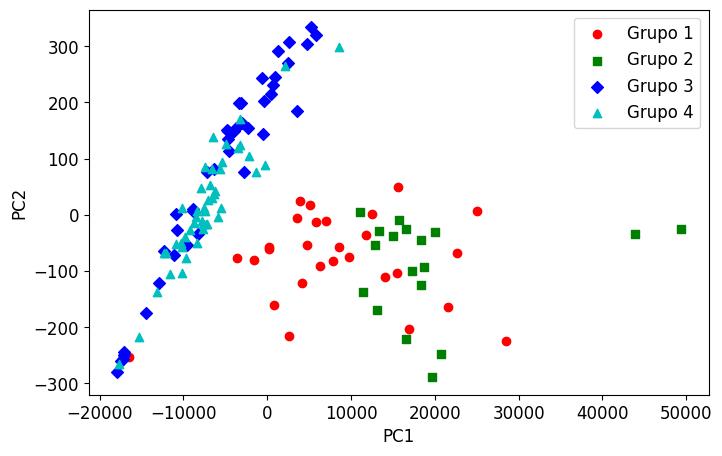

In [576]:
from sklearn.decomposition import PCA
labels = kmeans.labels_

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
colors = ['r', 'g', 'b', 'c']
markers = ['o', 's', 'D', '^']

# Visualizar los clusters
plt.figure(figsize=(8, 5))
for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=labels[cluster], c=colors[cluster], marker=markers[cluster])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [543]:
kmeans.labels_

array([2, 0, 0, 2, 2, 1, 3, 2, 1, 3, 3, 3, 2, 1, 2, 0, 0, 3, 3, 1, 0, 0,
       2, 0, 2, 1, 0, 1, 0, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 3, 2, 0, 3, 2,
       1, 2, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 2, 0, 1, 3, 3, 3, 1, 3, 2, 3, 0, 0, 2, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 3, 3, 2, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 1, 2, 1, 3, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 0, 1, 3, 0, 3, 3, 0, 2, 3, 2, 3, 2, 2, 0,
       3, 3, 2, 1])

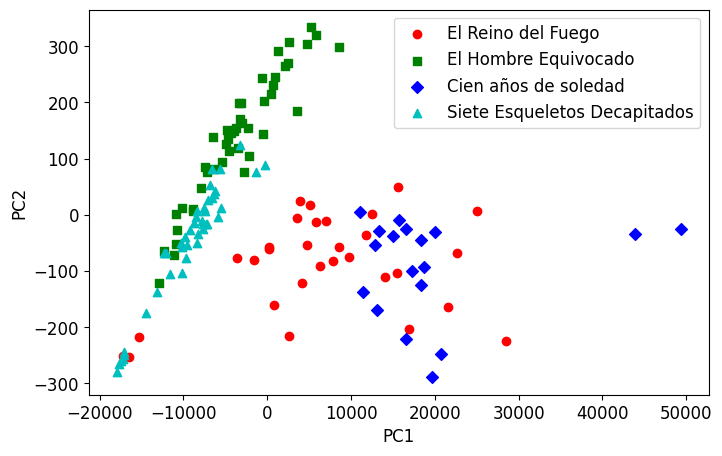

In [590]:
from sklearn.decomposition import PCA
labels = kmeans.labels_

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Libro']


labels = ['El Reino del Fuego', 'El Hombre Equivocado', 'Cien años de soledad', 'Siete Esqueletos Decapitados']
colors = ['r', 'g', 'b', 'c']
markers = ['o', 's', 'D', '^']

# Visualizar los clusters
plt.figure(figsize=(8, 5))
for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=labels[cluster], c=colors[cluster], marker=markers[cluster])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [545]:
pca_df

PC1         PC2  Cluster
0    -9623.464100  -53.798969        3
1     5113.334516   18.289778        0
2    11771.673334  -35.451736        0
3    -4517.499827  112.872416        1
4     -397.832676  201.675800        1
..            ...         ...      ...
131  16916.753048 -203.061220        0
132  -9854.351724  -38.759338        3
133  -6424.413427  138.539397        1
134 -17433.125423 -260.844199        3
135  13123.291471 -169.436529        2

[136 rows x 3 columns]

In [546]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples


# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include='number').columns
df_numeric = df[numeric_columns]

# Agregar la columna de clusters predichos para agrupar
df_numeric['Cluster'] = df['Cluster']

# Medidas Descriptivas
cluster_counts = df['Cluster'].value_counts()
cluster_purity = pd.crosstab(df['Cluster'], df['Libro'])
cluster_centers = df_numeric.groupby('Cluster').mean()
cluster_std = df_numeric.groupby('Cluster').std()

In [588]:
labels = ['El Reino del Fuego', 'El Hombre Equivocado', 'Cien años de soledad', 'Siete Esqueletos Decapitados']
clusters = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
colors = ['r', 'g', 'b', 'c']

# Crear un mapeo de clusters a etiquetas y colores
cluster_label_mapping = {i: labels[i] for i in range(len(labels))}
cluster_color_mapping = {i: colors[i] for i in range(len(colors))}

#print('Conteo de Clusters:')
cluster_counts

Cluster
3    47
2    42
0    29
1    18
Name: count, dtype: int64

In [548]:
coso = pd.DataFrame(cluster_purity)
coso

Libro     0   1   2   3
Cluster                
0        29   0   0   0
1         0   0  18   0
2         0  34   0   8
3         1  12   0  34

In [549]:
coso = pd.DataFrame(cluster_centers)
coso

Libro      Frases       NEU       POS       NEG  Felicidad  \
Cluster                                                                  
0             0.0  245.862069  0.415664  0.296446  0.287890   0.106934   
1             2.0  308.666667  0.425005  0.146063  0.428933   0.027242   
2        1.380952  232.595238  0.522284  0.178312  0.299404   0.042531   
3        2.425532  229.148936  0.499046  0.167233  0.333722   0.038444   

            Enojo  Disgusto  Tristeza  Sorpresa  ...  pos_prop_PART  \
Cluster                                          ...                  
0        0.033401  0.009306  0.105839  0.030356  ...       0.000713   
1        0.050114  0.011747  0.127174  0.015347  ...       0.000380   
2        0.021157  0.007006  0.057898  0.023178  ...       0.000155   
3        0.026461  0.008155  0.072354  0.028681  ...       0.000295   

         pos_prop_PRON  pos_prop_PROPN  pos_prop_PUNCT  pos_prop_SCONJ  \
Cluster                                                                  
0             0.095165        0.020311        0.123158        0.029082   
1             0.061060        0.039995        0.092864        0.025932   
2             0.071774        0.030644        0.162340        0.027168   
3             0.081582        0.038532        0.181627        0.029362   

         pos_prop_SYM  pos_prop_VERB  pos_prop_X  first_order_coherence  \
Cluster                                                                   
0            0.000446       0.129089    0.000184               0.607725   
1            0.000043       0.105471    0.000000               0.635856   
2            0.000109       0.130849    0.000281               0.495262   
3            0.000214       0.137373    0.000732               0.453390   

         second_order_coherence  
Cluster                          
0                      0.593081  
1                      0.631426  
2                      0.481141  
3                      0.430730  

[4 rows x 50 columns]

In [550]:
coso = pd.DataFrame(cluster_std)
coso

Libro      Frases       NEU       POS       NEG  Felicidad  \
Cluster                                                                  
0             0.0  101.178316  0.069498  0.089740  0.047332   0.106309   
1             0.0  133.156697  0.023191  0.024463  0.038600   0.008277   
2        0.794873  126.946322  0.025492  0.028522  0.040483   0.014935   
3        0.949707   92.316087  0.034149  0.027040  0.046613   0.015774   

            Enojo  Disgusto  Tristeza  Sorpresa  ...  pos_prop_PART  \
Cluster                                          ...                  
0        0.014932  0.005365  0.043913  0.011499  ...       0.000621   
1        0.017878  0.003033  0.037378  0.003411  ...       0.000199   
2        0.010583  0.002727  0.027075  0.007508  ...       0.000306   
3        0.012114  0.003969  0.043439  0.011301  ...       0.000310   

         pos_prop_PRON  pos_prop_PROPN  pos_prop_PUNCT  pos_prop_SCONJ  \
Cluster                                                                  
0             0.012544        0.018543        0.008997        0.004928   
1             0.005850        0.006706        0.006603        0.004949   
2             0.009314        0.009085        0.017662        0.004693   
3             0.009246        0.008268        0.014730        0.003865   

         pos_prop_SYM  pos_prop_VERB  pos_prop_X  first_order_coherence  \
Cluster                                                                   
0            0.000707       0.006412    0.000218               0.028463   
1            0.000091       0.005050    0.000000               0.045938   
2            0.000253       0.013249    0.000348               0.033243   
3            0.000417       0.006687    0.000585               0.037107   

         second_order_coherence  
Cluster                          
0                      0.031515  
1                      0.047167  
2                      0.033023  
3                      0.032193  

[4 rows x 50 columns]

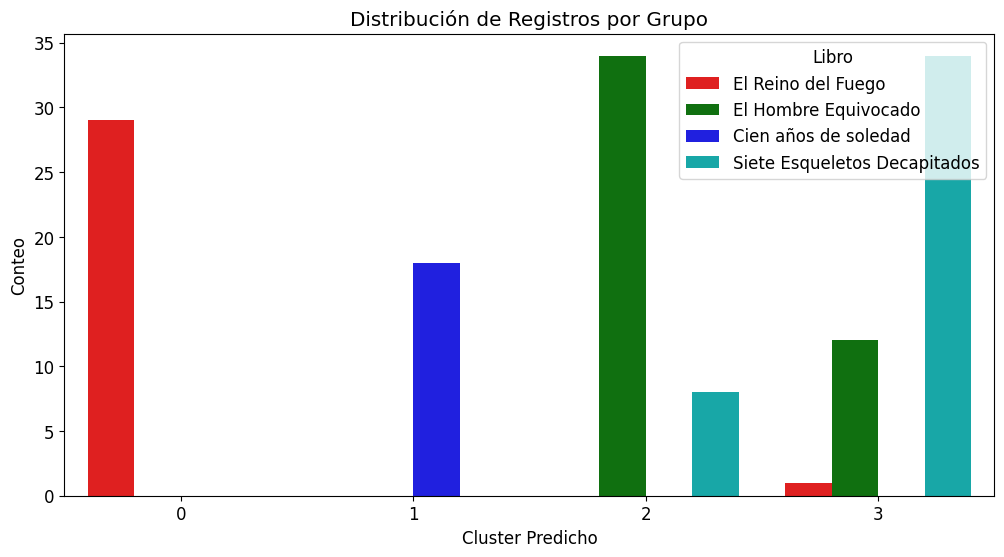

In [589]:
# Crear un mapeo de clusters a etiquetas y colores
cluster_label_mapping = {i: labels[i] for i in range(len(labels))}
cluster_color_mapping = {i: colors[i] for i in range(len(colors))}

# Distribución de Clusters
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cluster', hue='Libro', palette=colors)
plt.title('Distribución de Registros por Grupo')
plt.xlabel('Cluster Predicho')
plt.ylabel('Conteo')
plt.legend(title='Libro', labels=labels)
plt.show()


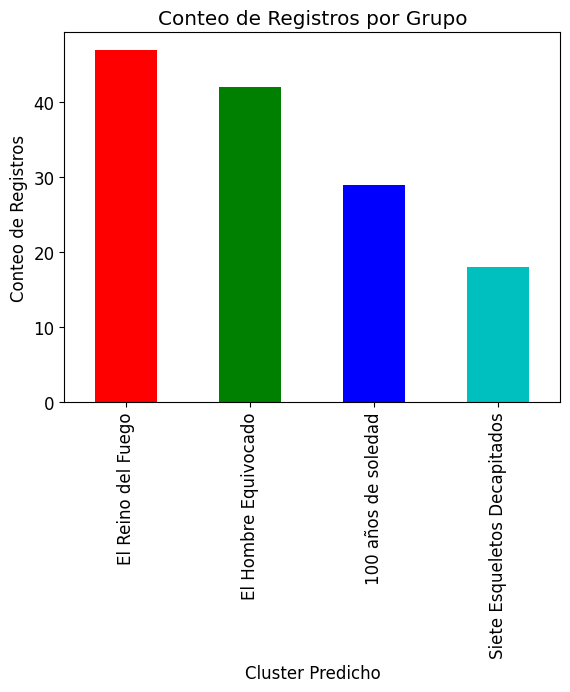

In [581]:
# Gráficos de Barras
cluster_counts.plot(kind='bar', title='Conteo de Registros por Grupo', color=colors)
plt.xlabel('Cluster Predicho')
plt.ylabel('Conteo de Registros')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

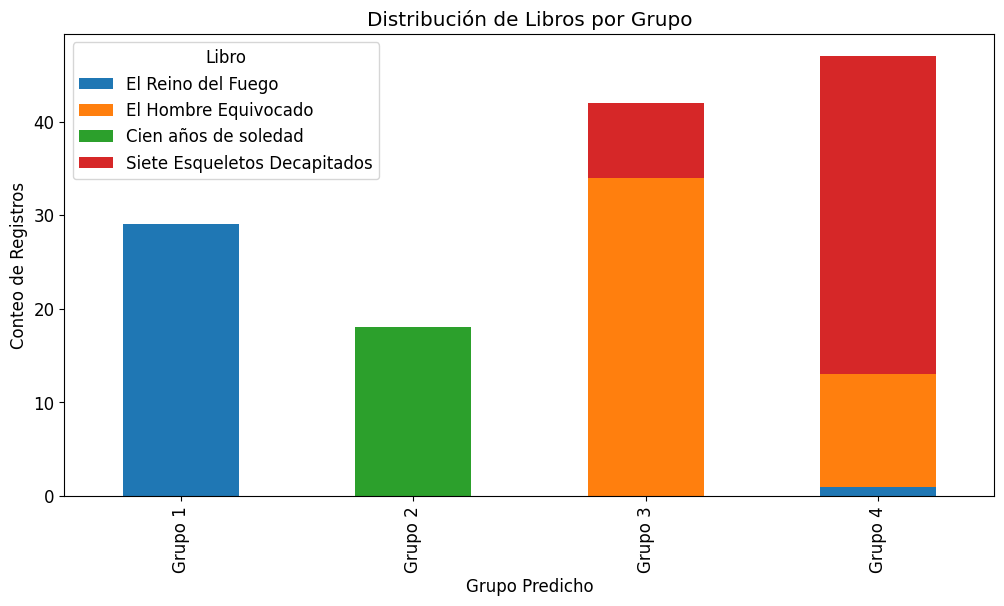

In [591]:
cluster_purity.plot(kind='bar', stacked=True, title='Distribución de Libros por Grupo', figsize=(12,6))
plt.xlabel('Grupo Predicho')
plt.ylabel('Conteo de Registros')
plt.legend(title='Libro', labels=labels)
plt.xticks(ticks=range(len(clusters)), labels=clusters)
plt.show()

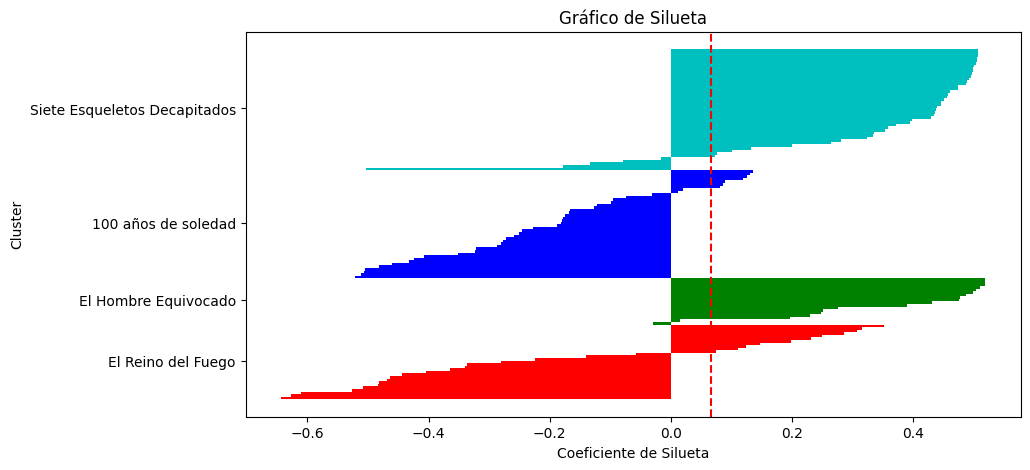

In [554]:
# Gráficos de Silueta
sil_score = silhouette_score(df_numeric.drop(columns=['Cluster']), df_numeric['Cluster'])
silhouette_vals = silhouette_samples(df_numeric.drop(columns=['Cluster']), df_numeric['Cluster'])

plt.figure(figsize=(10, 5))
y_lower, y_upper = 0, 0
yticks = []

for i, cluster in enumerate(np.unique(df_numeric['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[df_numeric['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = cluster_color_mapping[cluster]
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1, color=color)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=sil_score, color="red", linestyle="--")
plt.yticks(yticks, labels)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de Silueta')
plt.title('Gráfico de Silueta')
plt.show()